# Data-visualisation - Partie 1

### Un excellent graphique est celui qui donne au spectateur le plus grand nombre d'idées avec le moins d'encre possible, dans le plus petit espace. 
Edward R. Tufte, Professeur de statistiques à l’université de Yale

En datascience, il existe plusieurs bibliothèques pour afficher des graphiques :
- matplotlib
- pandas : pandas utiliser une version trop simplifiée de matplotlib (à éviter si possible)
- seaborn : une version améliorée de matplotlib

Dans le cadre de ce TP nous allons utiliser seaborn. Pourquoi ? L'outil offre plus de graphiques comparé à matplotlib et des designs plus élégants. Toutefois, pour utiliser seaborn, il faudra utiliser (et importer) matplotlib pour afficher nos graphiques. Notez qu'il existe également yellowbrick ou encore bokeh pour gérer les graphiques avec plus d'interactions ou encore plus de type de graphiques.

- [Voir un ensemble d'exemples avec code (en anglais)](https://www.python-graph-gallery.com/all-charts/)

Et pour tester ce nouvel outil, nous allons réutiliser notre DataFrame des naissances par département. Malgré son petit nombre de colonnes, il est possible de s'essayer avec plein de types de graphiques.

**Cette phase de construction de graphiques (ou data-visualisations) s'installe aussi bien dans phase d'exploration ou encore d'évaluation/interprétation de notre démarche de data-scientifique.**

# Seaborn

![logo seaborn](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

Lors du tp précédent, nous avons entrevu matplotlib, assurément la bibliothèque la plus utilisée en datascience pour afficher des datavisualisation. Malheureusement matplotlib pèche par sa complexité et ses limitations notamment en terme de choix de graphiques ou encore de design. Seaborn, nous permet de contrevenir à certains problèmes de matplotlib notamment en rajoutant de nouveaux types de graphiques ou du design.

**Etant basé sur matplotlib, il est indispensable d'importer matplotlib pour utiliser seaborn.** Deuxième remarque, si seul le design vous intéresse, il est possible d'utiliser le style de seaborn dans matplotlib avec le code suivant.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
```
Le code ci-dessus, nous permet d'utiliser le design des graphiques de seaborn dans matplotlib.

Enfin pandas propose sa version de matplotlib, il est préférable de l'éviter, elle est très limitée. 

In [5]:
# On importe seaborn et matplotlib vu que nous allons l'utiliser
import seaborn as sns
import matplotlib.pyplot as plt

# Et on importe toujours pandas et numpy
import pandas as pd
import numpy as np

Quelque soit le type de graphique, le principe est le même, on va définir une conteneur de notre graphique, souvent appelé

# Ligne / courbe (line chart)

![Graphique en ligne](_images/line-chart.png)

Assurément l'un des graphiques les plus simples, la ligne permet soit d'afficher la corrélation entre données (une données est exprimée sur l'axe X, et l'autre sur l'axe Y) ou l'évolution d'une donnée au fil du temps. Par ailleurs, notez qu'il est possible d'avoir plusieurs axe Y ou X, mais faites attention à la lisibilité.

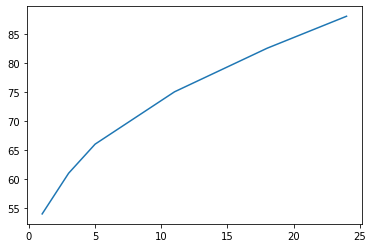

In [20]:
# Dataset
tailles = [54, 61, 66, 69, 72, 75, 82.5, 88]
age = [1, 3, 5, 7, 9, 11, 18, 24]

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)
 
# Affiche le graphique, équivalent d'un display() pour un DataFrame
# facultatif
plt.show()

C'est bien tout ça, mais sans légende, notre graphique ne sert un peu à rien. Nous allons donc voir deux nouvelles méthodes nous permettant d'afficher un texte pour l'axe des ordonnées et celui des abscisses.

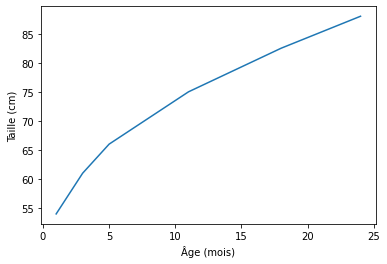

In [19]:
# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Notre graphique est plus clair, oui, mais il lui manque un titre pour rentre le tout compréhensible

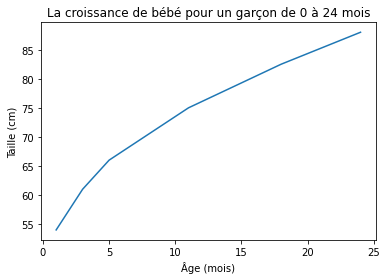

Text(0.5, 1.0, 'La croissance de bébé pour un garçon de 0 à 24 mois')

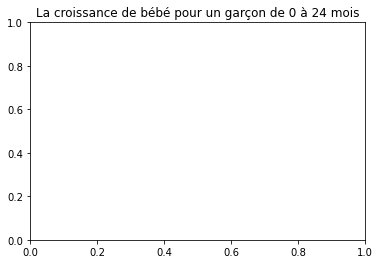

In [25]:
# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot(age, tailles)

# Définit le titre de notre graphique
plt.title(f'La croissance de bébé pour un garçon de 0 à 24 mois')

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Voilà, nous avons notre graphique. 
Avant de l'améliorer un peu en rajoutant les données d'une fille. Remarquez que chaque `plt.show()` définit un graphique, ainsi, dans l'exemple précédent, si vous prenez, par exemple la ligne `plt.title(f'La croissance de bébé pour un garçon de 0 à 24 mois')`, et que vous la mettez après `plt.show()`, ceci affichera un nouveau graphique vide avec juste le titre défini. Essayez.

Continuons.

Notre graphique est bien, mais il nous manque les données des filles pour comparer. Ajoutons-les.

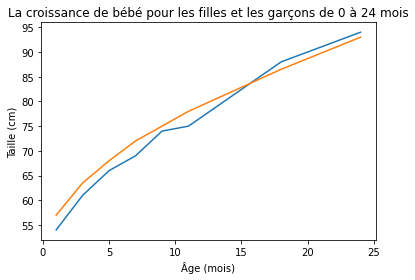

In [37]:
liste_ages = [1, 3, 5, 7, 9, 11, 18, 24]
garcon_df = pd.DataFrame.from_dict({
    "taille": [54, 61, 66, 69, 74, 75, 88, 94],
    "age": liste_ages
})

fille_df = pd.DataFrame.from_dict({
    "taille": [57, 63.5, 68, 72, 75, 78, 86.5, 93],
    "age": liste_ages
})

# Vu que nous utilisons un dataframe maintenant, nous allons en profiter
# les paramètres x et y peuvent être remplacés par une chaîne de caractères s'il y le paramètre "data", un DataFrame
# les paramètes x et y deviennent donc des clés de notre DataFrame
plt.plot("age", "taille", data=garcon_df)

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot("age", "taille", data=fille_df)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Définit le titre de notre graphique
plt.title(f'La croissance de bébé pour les filles et les garçons de 0 à 24 mois')

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

C'est bien, nous avons notre graphique avec nos deux graphiques, toutefois que représente l'orange ? Que représente le bleu ? Personne ne le sait, utilisons donc la méthode `.legend()`. On va donc l'utiliser sur notre graphique.

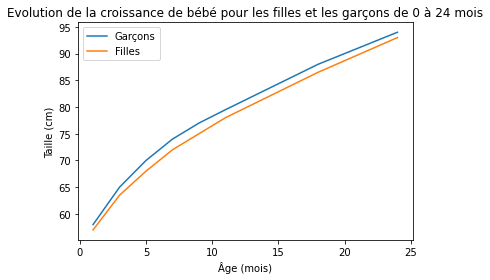

In [46]:
liste_ages = [1, 3, 5, 7, 9, 11, 18, 24]
garcon_df = pd.DataFrame.from_dict({
    "taille": [58, 65, 70, 74, 77, 79.5, 88, 94],
    "age": liste_ages
})

fille_df = pd.DataFrame.from_dict({
    "taille": [57, 63.5, 68, 72, 75, 78, 86.5, 93],
    "age": liste_ages
})

# Vu que nous utilisons un dataframe maintenant, nous allons en profiter
# les paramètres x et y peuvent être remplacés par une chaîne de caractères s'il y le paramètre "data", un DataFrame
# les paramètes x et y deviennent donc des clés de notre DataFrame
plt.plot("age", "taille", data=garcon_df)

# graphique type ligne
# première valeur = x
# deuxième valeur = y
plt.plot("age", "taille", data=fille_df)

# Définit, dans l'ordre, la légende des abscisses et des ordonnées
plt.xlabel("Âge (mois)")
plt.ylabel("Taille (cm)")

# Définit le titre de notre graphique
plt.title(f'Evolution de la croissance de bébé pour les filles et les garçons de 0 à 24 mois')

# Définit l'intitulé de nos courbes
# En absence de paramètres, l'intitulé sera la valeur de la clé définie en y dans la fonction plot
plt.legend(['Garçons', 'Filles'])

# Affiche le graphique, équivalent d'un display() pour un DataFrame
plt.show()

Voilà, nous avons notre graphique, néanmoins, nous allons essayer de changer les choses suivantes :
- Taille de notre graphique
- Couleur de notre graphique
- Styliser nos textes

Pour la taille de notre graphique, nous allons devoir utiliser la classe `figure`, cette dernière sert de conteneur à nos graphique. Précédemment, nous n'en avions pas besoin car nous utilisions les paramètres par défaut, l'utilisation de figure étant implicite.

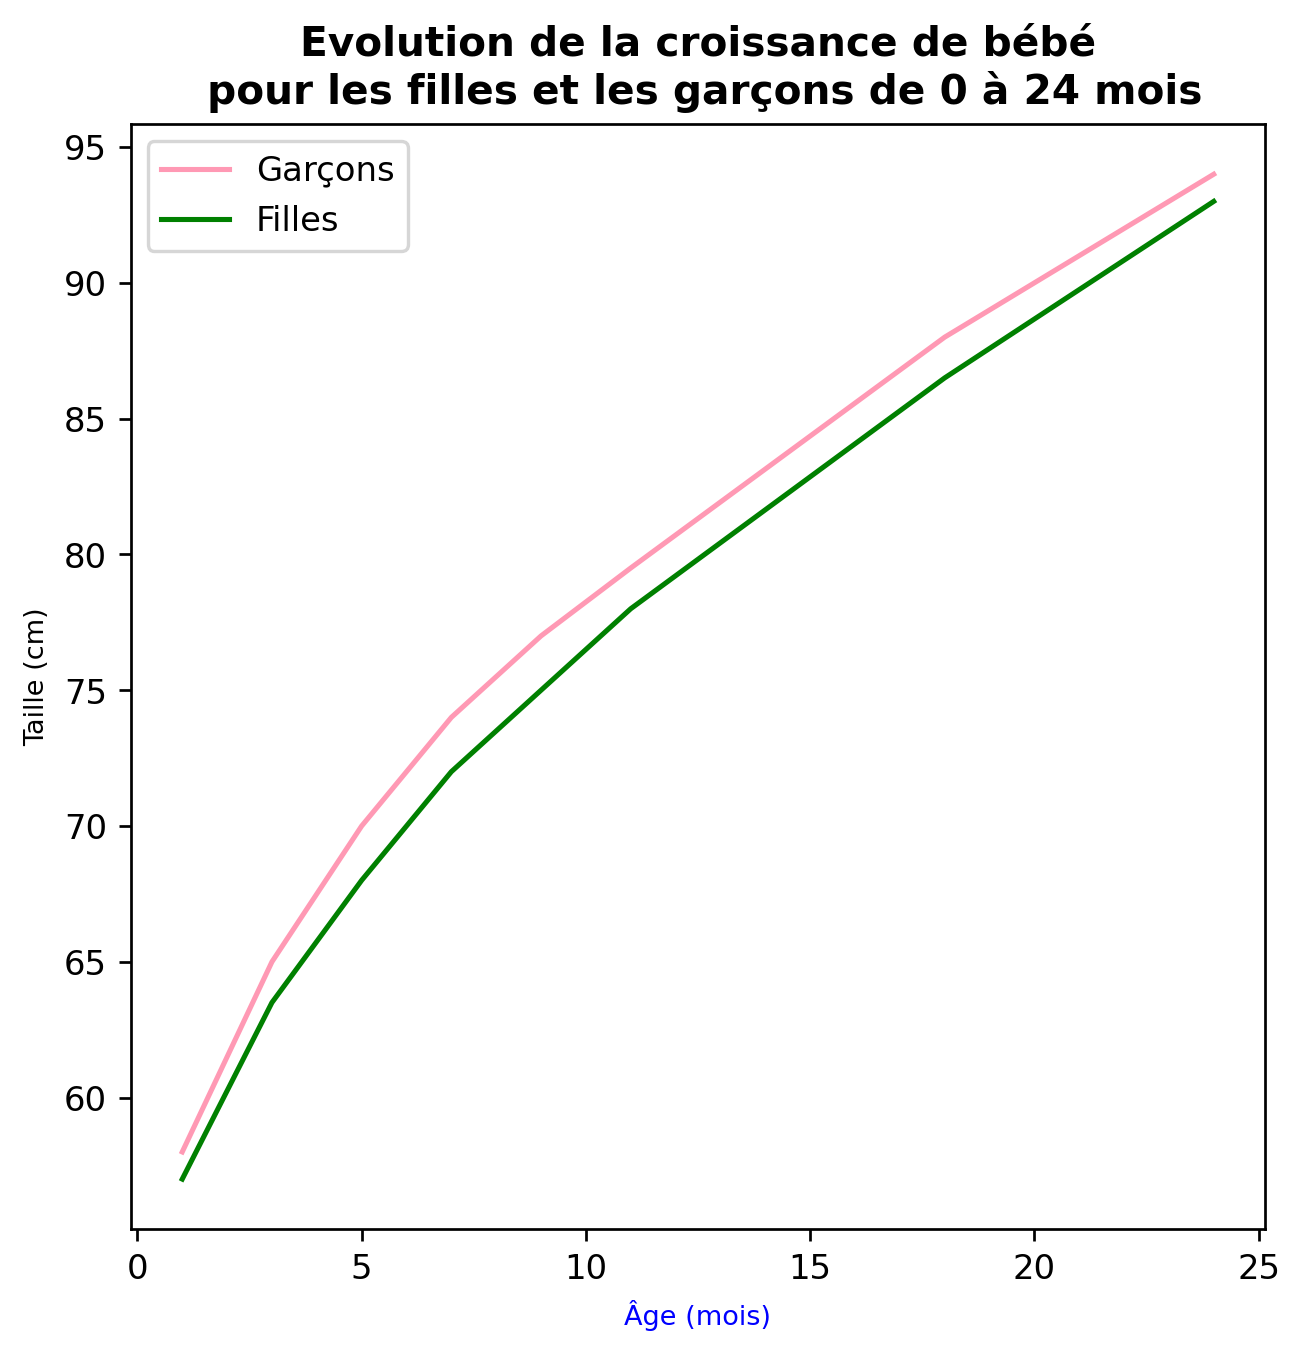

In [70]:
# On définit notre contexte de graphique
# ici nous définissons la taille de notre graphique en pouces (1 in = ~2.52cm)
# dpi défini la densité de pixels de notre image, plus elle sera élevé, plus il sera possible de zoomer
# On zoome en double cliquant sur notre graphique, ce comportement peut varier en fonction 
plt.figure(figsize=(6, 6), dpi=244)

plt.plot("age", "taille", data=garcon_df, color='#ff99b4')
plt.plot("age", "taille", data=fille_df, color= "green")
# Documentation type de couleurs : https://matplotlib.org/stable/tutorials/colors/colors.html

plt.xlabel(
    "Âge (mois)",
    fontsize=8,
    color="blue"
)
plt.ylabel(
    "Taille (cm)", 
    fontsize=8,
   
)

plt.title(
    # \n, signifie "retour à la ligne"
    f'Evolution de la croissance de bébé\n pour les filles et les garçons de 0 à 24 mois',
    # Notre texte passe en gras
    fontweight="bold"
)

plt.legend(['Garçons', 'Filles'])

plt.show()

- [Voir les propriétés possibles pour le texte](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)

### Un petit peu de vocabulaire

![Graphique en ligne](_images/anatomy.png)

- [Voir l'anatomie d'un graphique](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

Avant de terminer sur le graphique de type ligne, nous allons appliquer le style de seaborn sur notre graphique et afficher la grille.
Pour la grille, il vous suffira de coller le code suivant :
plt.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
- [Documentation de la méthode "grid"](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)



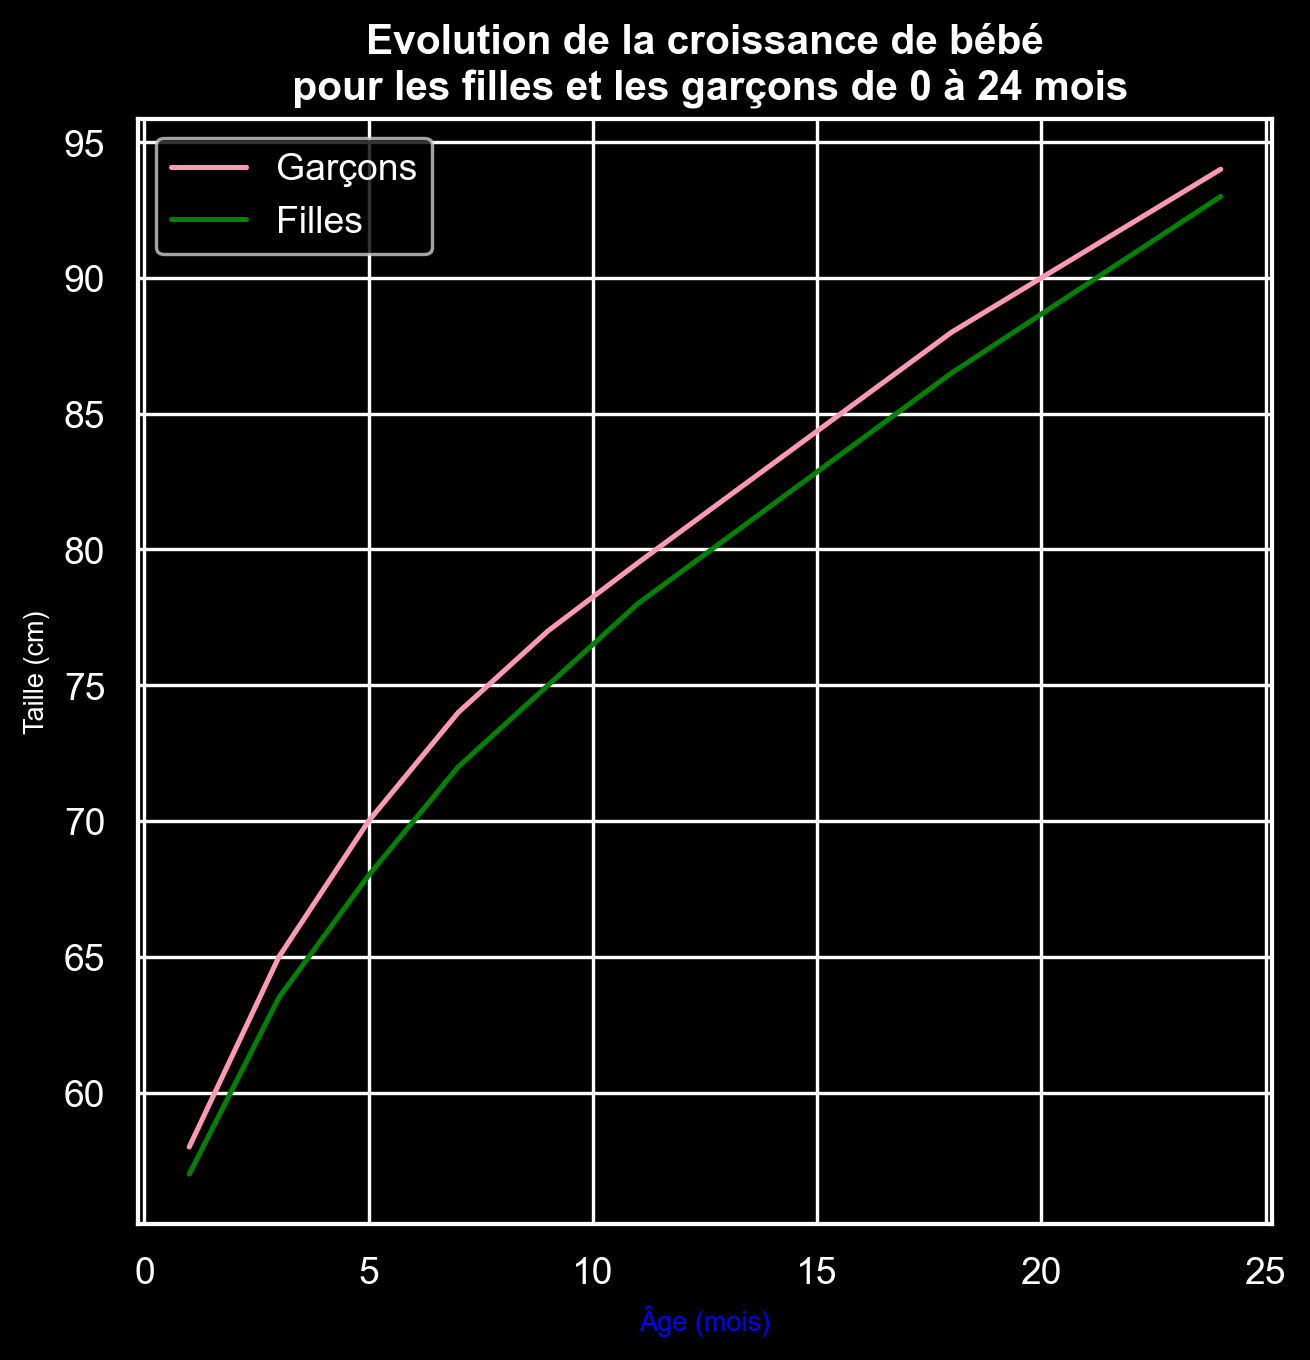

In [78]:
# On active le style de seaborn et le thème sombre 
sns.set()
plt.style.use("dark_background")

# Collez ici le graphique de la cellule précédente en dessous

Avant de terminer et voir d'autres types de graphiques, sachez qu'il est possible d'entregistrer sous forme d'images vos graphiques. Les formats disponibles sont les suivants :
- bitmap : .jpg, .png
- matriciels : .pdf, .eps ou .svg

Il faudra utiliser à la méthode `savefig`. Elle s'utilise la façon suivante.
```python
plt.savefig('nom-du-fichier') # par défault le fichier est au format ".png", mais on peut rajouter une des extensions listée plus haut. Exemple :

# Sauvegarde le fichier au format .eps
plt.savefig('nom-du-fichier.eps')
```

**Essayez sur le graphique plus haut.**
Note : Pour les utilisateurs de Google colab, veuillez regarder la cellule en-dessous avant.

- [Voir documentation officielle de la méthode .savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig)

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `plt.savefig()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir **télécharger** un fichier, les voici.

```python
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 
```

Porchaine partie : découverte d'autres types de graphiques et bien plus encore.